#U-NET

Implemented By Muhammad Hanan Asghar

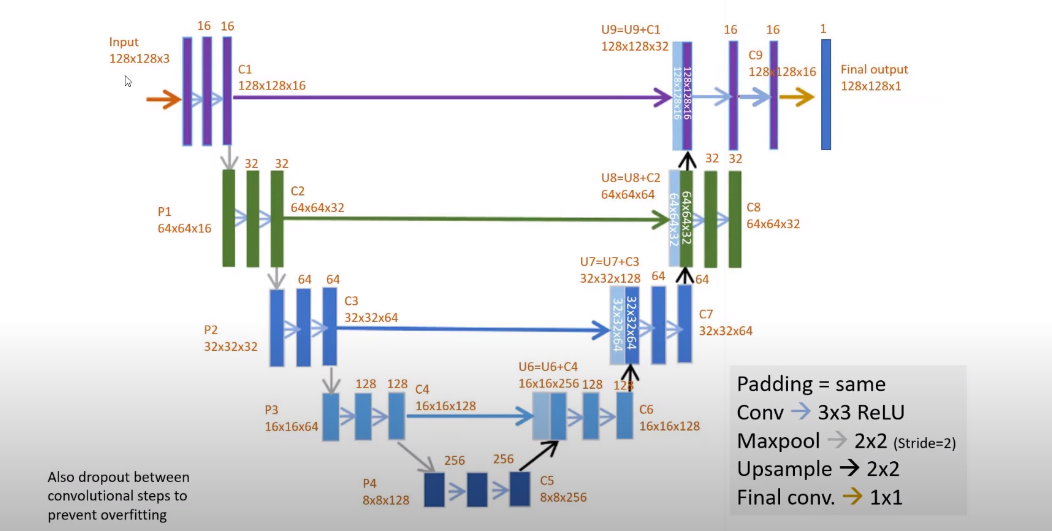

#Model

In [1]:
import tensorflow as tf

In [43]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [44]:
# Contraction or Encoder Part

input = tf.keras.layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
# Converting Integers to Floats
s = tf.keras.layers.Lambda(lambda x : x / 255.)(input)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(s)
c1 = tf.keras.layers.Dropout(rate=0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(c1)
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(rate=0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(c2)
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(rate=0.1)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(c3)
p3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(rate=0.1)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(rate=0.1)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(c5)

# Expansion or Decoder Part
u6 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding="same")(c5)
u6 = tf.keras.layers.add([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(rate=0.1)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same")(c6)
u7 = tf.keras.layers.add([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(rate=0.1)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding="same")(c7)
u8 = tf.keras.layers.add([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(rate=0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), padding="same")(c8)
u9 = tf.keras.layers.add([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(rate=0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding="same")(c9)

output = tf.keras.layers.Conv2D(1, (1, 1), activation="sigmoid")(c9)
model = tf.keras.models.Model(inputs = [input], outputs = [output])

In [45]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 128, 128, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 128, 128, 16  448         ['lambda_2[0][0]']               
                                )                                                                 
                                                                                            

#Callbacks

In [46]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("u-net_model.h5",
                                              monitor="val_loss",
                                              mode="min",
                                              save_best_only=True,
                                              verbose=1)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                 min_delta=0,
                                                 patience=3,
                                                 verbose=1,
                                                 restore_best_weights=True)

tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs")
callbacks = [earlystopping, checkpoint, tensorboard]

#Training

In [ ]:
!unzip *.zip

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import glob
import os

In [48]:
X = sorted(glob.glob(os.path.join("DSB","images","*.jpg")))
Y = sorted(glob.glob(os.path.join("DSB","masks","*.jpg")))

In [49]:
x,y = shuffle(X, Y)

In [50]:
split = 0.2
size = int(len(X) * split)

In [51]:
train_x,valid_x = train_test_split(X, test_size=size,random_state=1)
train_y,valid_y = train_test_split(Y, test_size=size,random_state=1)

In [52]:
train_x,test_x = train_test_split(train_x,test_size=size,random_state=1)
train_y,test_y = train_test_split(train_y,test_size=size,random_state=1)

In [53]:
print(len(train_x),'-',len(train_y))
print(len(valid_x),'-',len(valid_y))
print(len(test_x),'-',len(test_y))

402 - 402
134 - 134
134 - 134


In [55]:
import cv2
import numpy as np

def read_image(path):
  path = path.decode()
  x = cv2.imread(path,cv2.IMREAD_COLOR)
  x = cv2.resize(x, (128, 128))
  x = x/255.0
  x = x.astype(np.float32)
  return x

In [56]:
def read_mask(path):
  path = path.decode()
  x = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  x = cv2.resize(x, (128, 128))
  x = x/255.0
  x = x.astype(np.float32)
  x = np.expand_dims(x,axis=-1) #(256,256,1)
  return x

In [57]:
def tf_parse(x,y):
  def _parse(x,y):
    x = read_image(x)
    y = read_mask(y)
    return x,y
  x,y = tf.numpy_function(_parse,[x,y],[tf.float32,tf.float32])
  x.set_shape([128,128,3])
  y.set_shape([128,128,1])
  return x,y

In [58]:
def tf_dataset(X,Y,batch_size=2):
  dataset = tf.data.Dataset.from_tensor_slices((X,Y))
  dataset = dataset.map(tf_parse)
  dataset = dataset.batch(batch_size)
  dataset = dataset.prefetch(4)
  return dataset

In [66]:
train_dataset = tf_dataset(train_x,train_y)
valid_dataset = tf_dataset(valid_x,valid_y)

In [67]:
def iou(y_true,y_pred):
  def f(y_true,y_pred):
    intersection = (y_true*y_pred).sum()
    union = y_true.sum() + y_pred.sum() - intersection
    x = (intersection + 1e-15) / (union + 1e-15)
    x = x.astype(np.float32)
    return x
  return tf.numpy_function(f,[y_true,y_pred],tf.float32)

In [68]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy", iou])

In [69]:
model_history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=valid_dataset,
    callbacks=callbacks
)

Epoch 1/100
201/201 [==============================] - ETA: 0s - loss: 0.1080 - accuracy: 0.8118 - iou: 0.6185
Epoch 1: val_loss did not improve from 0.08672
201/201 [==============================] - 9s 35ms/step - loss: 0.1080 - accuracy: 0.8118 - iou: 0.6185 - val_loss: 0.0894 - val_accuracy: 0.8264 - val_iou: 0.6568
Epoch 2/100
201/201 [==============================] - ETA: 0s - loss: 0.1083 - accuracy: 0.8118 - iou: 0.6186
Epoch 2: val_loss did not improve from 0.08672
201/201 [==============================] - 7s 33ms/step - loss: 0.1083 - accuracy: 0.8118 - iou: 0.6186 - val_loss: 0.0872 - val_accuracy: 0.8266 - val_iou: 0.6701
Epoch 3/100
200/201 [============================>.] - ETA: 0s - loss: 0.1056 - accuracy: 0.8122 - iou: 0.6246
Epoch 3: val_loss improved from 0.08672 to 0.08515, saving model to u-net_model.h5
201/201 [==============================] - 6s 32ms/step - loss: 0.1053 - accuracy: 0.8124 - iou: 0.6247 - val_loss: 0.0852 - val_accuracy: 0.8270 - val_iou: 0.672

In [70]:
test_dataset = tf_dataset(test_x,test_y)

In [91]:
for x, y in test_dataset:
  image_cell, target_img = x, y
  break

In [92]:
image_cell.shape

TensorShape([2, 128, 128, 3])

Text(0.5, 1.0, 'Source')

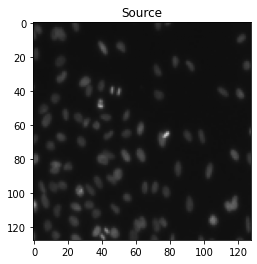

In [93]:
import matplotlib.pyplot as plt

plt.imshow(image_cell[1])
plt.title("Source")

Text(0.5, 1.0, 'Ground')

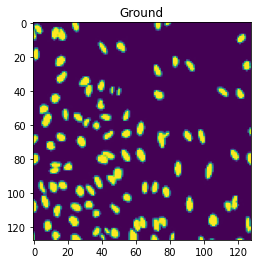

In [94]:
import matplotlib.pyplot as plt

plt.imshow(target_img[1].numpy().reshape((128, 128)))
plt.title("Ground")

In [95]:
pred = model.predict(tf.expand_dims(image_cell[1], 0))

Text(0.5, 1.0, 'Prediction')

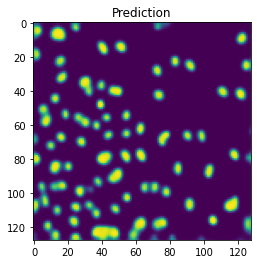

In [96]:
import matplotlib.pyplot as plt

plt.imshow(pred.reshape((128, 128)))
plt.title("Prediction")